In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
movie=pd.read_csv("IMDb Movies India.csv",encoding="latin-1")

In [3]:
movie.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [4]:
movie.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [5]:
movie["Rating"].fillna(movie["Rating"].median(),inplace=True)

C:\Users\Aasif\AppData\Local\Temp\ipykernel_18484\3714181421.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movie["Rating"].fillna(movie["Rating"].median(),inplace=True)


In [6]:
movie["Rating"]

0        6.0
1        7.0
2        6.0
3        4.4
4        6.0
        ... 
15504    4.6
15505    4.5
15506    6.0
15507    6.0
15508    6.2
Name: Rating, Length: 15509, dtype: float64

In [7]:
movie=movie.dropna()

In [8]:
movie.shape

(5659, 10)

In [9]:
movie["Year"]=movie["Year"].str.strip('()').astype(int)

In [10]:
movie["Year"]

1        2019
3        2019
5        1997
6        2005
8        2012
         ... 
15493    2015
15494    2001
15503    1989
15505    1999
15508    1998
Name: Year, Length: 5659, dtype: int32

In [11]:
movie["Duration"]=movie["Duration"].str.strip('min').astype(int)

In [12]:
movie["Duration"]

1        109
3        110
5        147
6        142
8         82
        ... 
15493    115
15494    153
15503    125
15505    129
15508    130
Name: Duration, Length: 5659, dtype: int32

In [13]:
movie["Votes"]=movie["Votes"].str.replace(',','').astype(int)

In [14]:
movie["Votes"]

1           8
3          35
5         827
6        1086
8         326
         ... 
15493     408
15494    1496
15503      44
15505     655
15508      20
Name: Votes, Length: 5659, dtype: int32

In [15]:
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


<Axes: ylabel='Genre'>

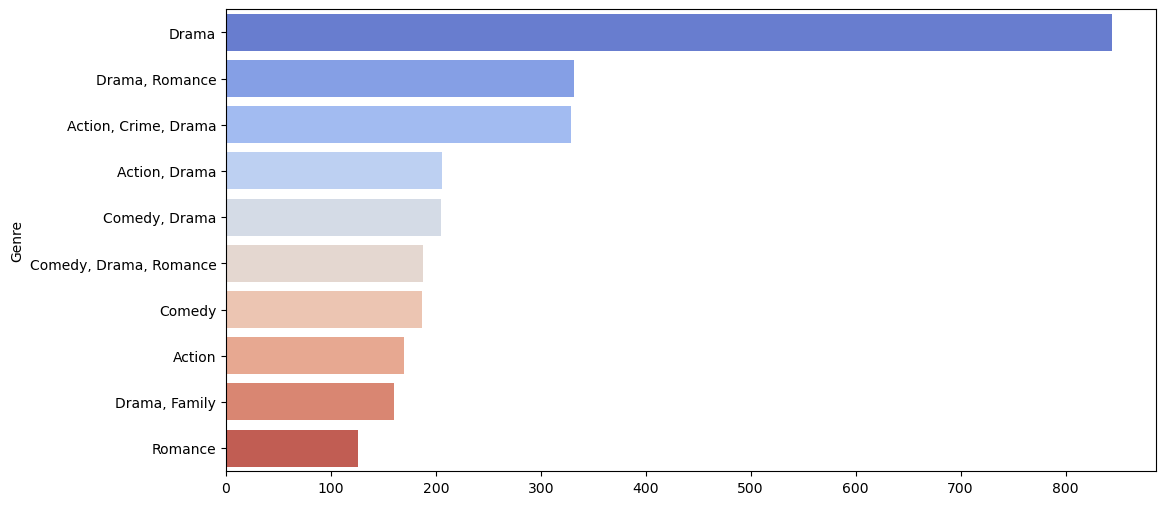

In [16]:
genre_counts = movie['Genre'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='coolwarm')

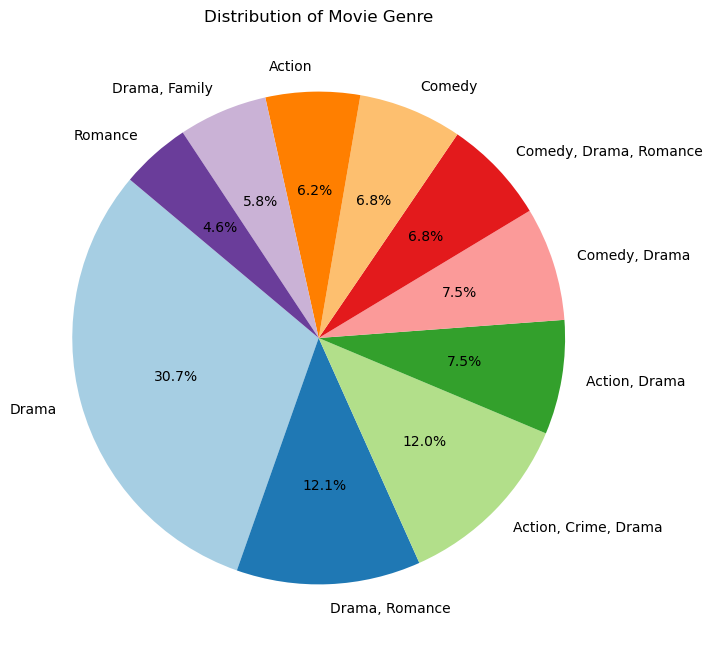

In [17]:
Genre_counts = movie['Genre'].value_counts().head(10)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(Genre_counts, labels=Genre_counts.index, autopct='%1.1f%%', startangle=140,colors=plt.cm.Paired.colors)
plt.title('Distribution of Movie Genre')
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le=LabelEncoder()
movie['Genre']=le.fit_transform(movie['Genre'])

In [20]:
movie['Genre']

1        229
3        184
5        157
6        289
8        320
        ... 
15493    229
15494    133
15503     28
15505     38
15508     38
Name: Genre, Length: 5659, dtype: int32

In [21]:
movie['Director']=le.fit_transform(movie['Director'])

In [22]:
movie['Actor 1']=le.fit_transform(movie['Actor 1'])

In [23]:

movie['Actor 2']=le.fit_transform(movie['Actor 2'])

In [24]:
movie['Actor 3']=le.fit_transform(movie['Actor 3'])

In [25]:
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,229,7.0,8,629,1352,2272,319
3,#Yaaram,2019,110,184,4.4,35,1335,1198,719,2148
5,...Aur Pyaar Ho Gaya,1997,147,157,4.7,827,1530,378,75,2045
6,...Yahaan,2005,142,289,7.4,1086,2044,692,1112,2524
8,?: A Question Mark,2012,82,320,5.6,326,135,1934,1175,1013


In [26]:
movie.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

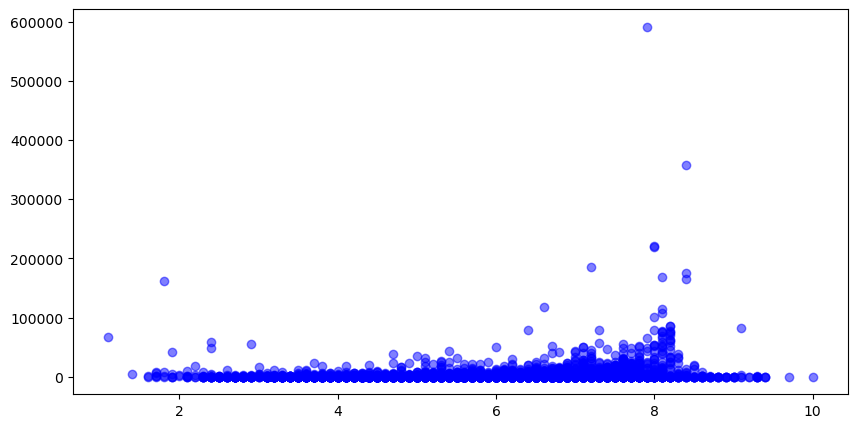

In [27]:
plt.figure(figsize=(10,5))
plt.scatter(movie['Rating'],movie['Votes'],color='blue',alpha=0.5)

In [28]:
top_rated=movie.sort_values(by="Rating",ascending=False,).head(10)

Text(0.5, 1.0, 'Top 10 Highest Rated Movies')

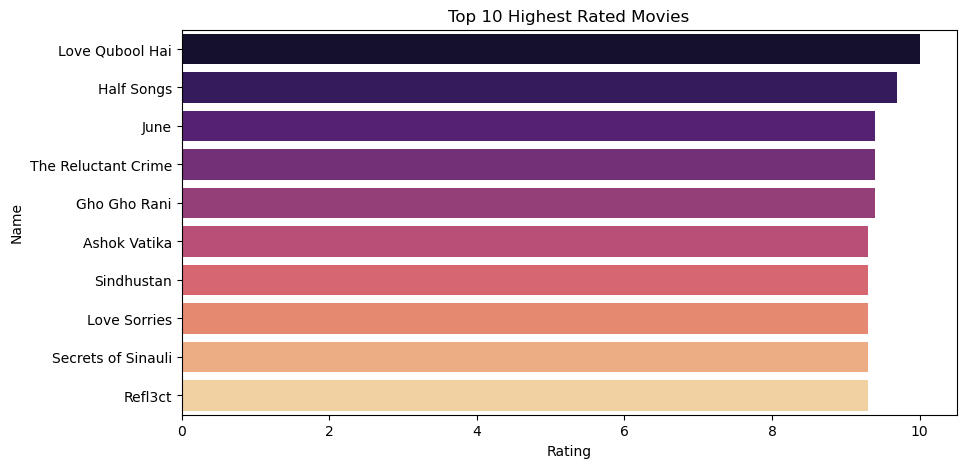

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(x='Rating',y='Name',data=top_rated,palette='magma')
plt.title('Top 10 Highest Rated Movies')

C:\Users\Aasif\anaconda3\envs\bca_ds\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aasif\anaconda3\envs\bca_ds\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aasif\anaconda3\envs\bca_ds\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aasif\anaconda3\envs\bca_ds\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

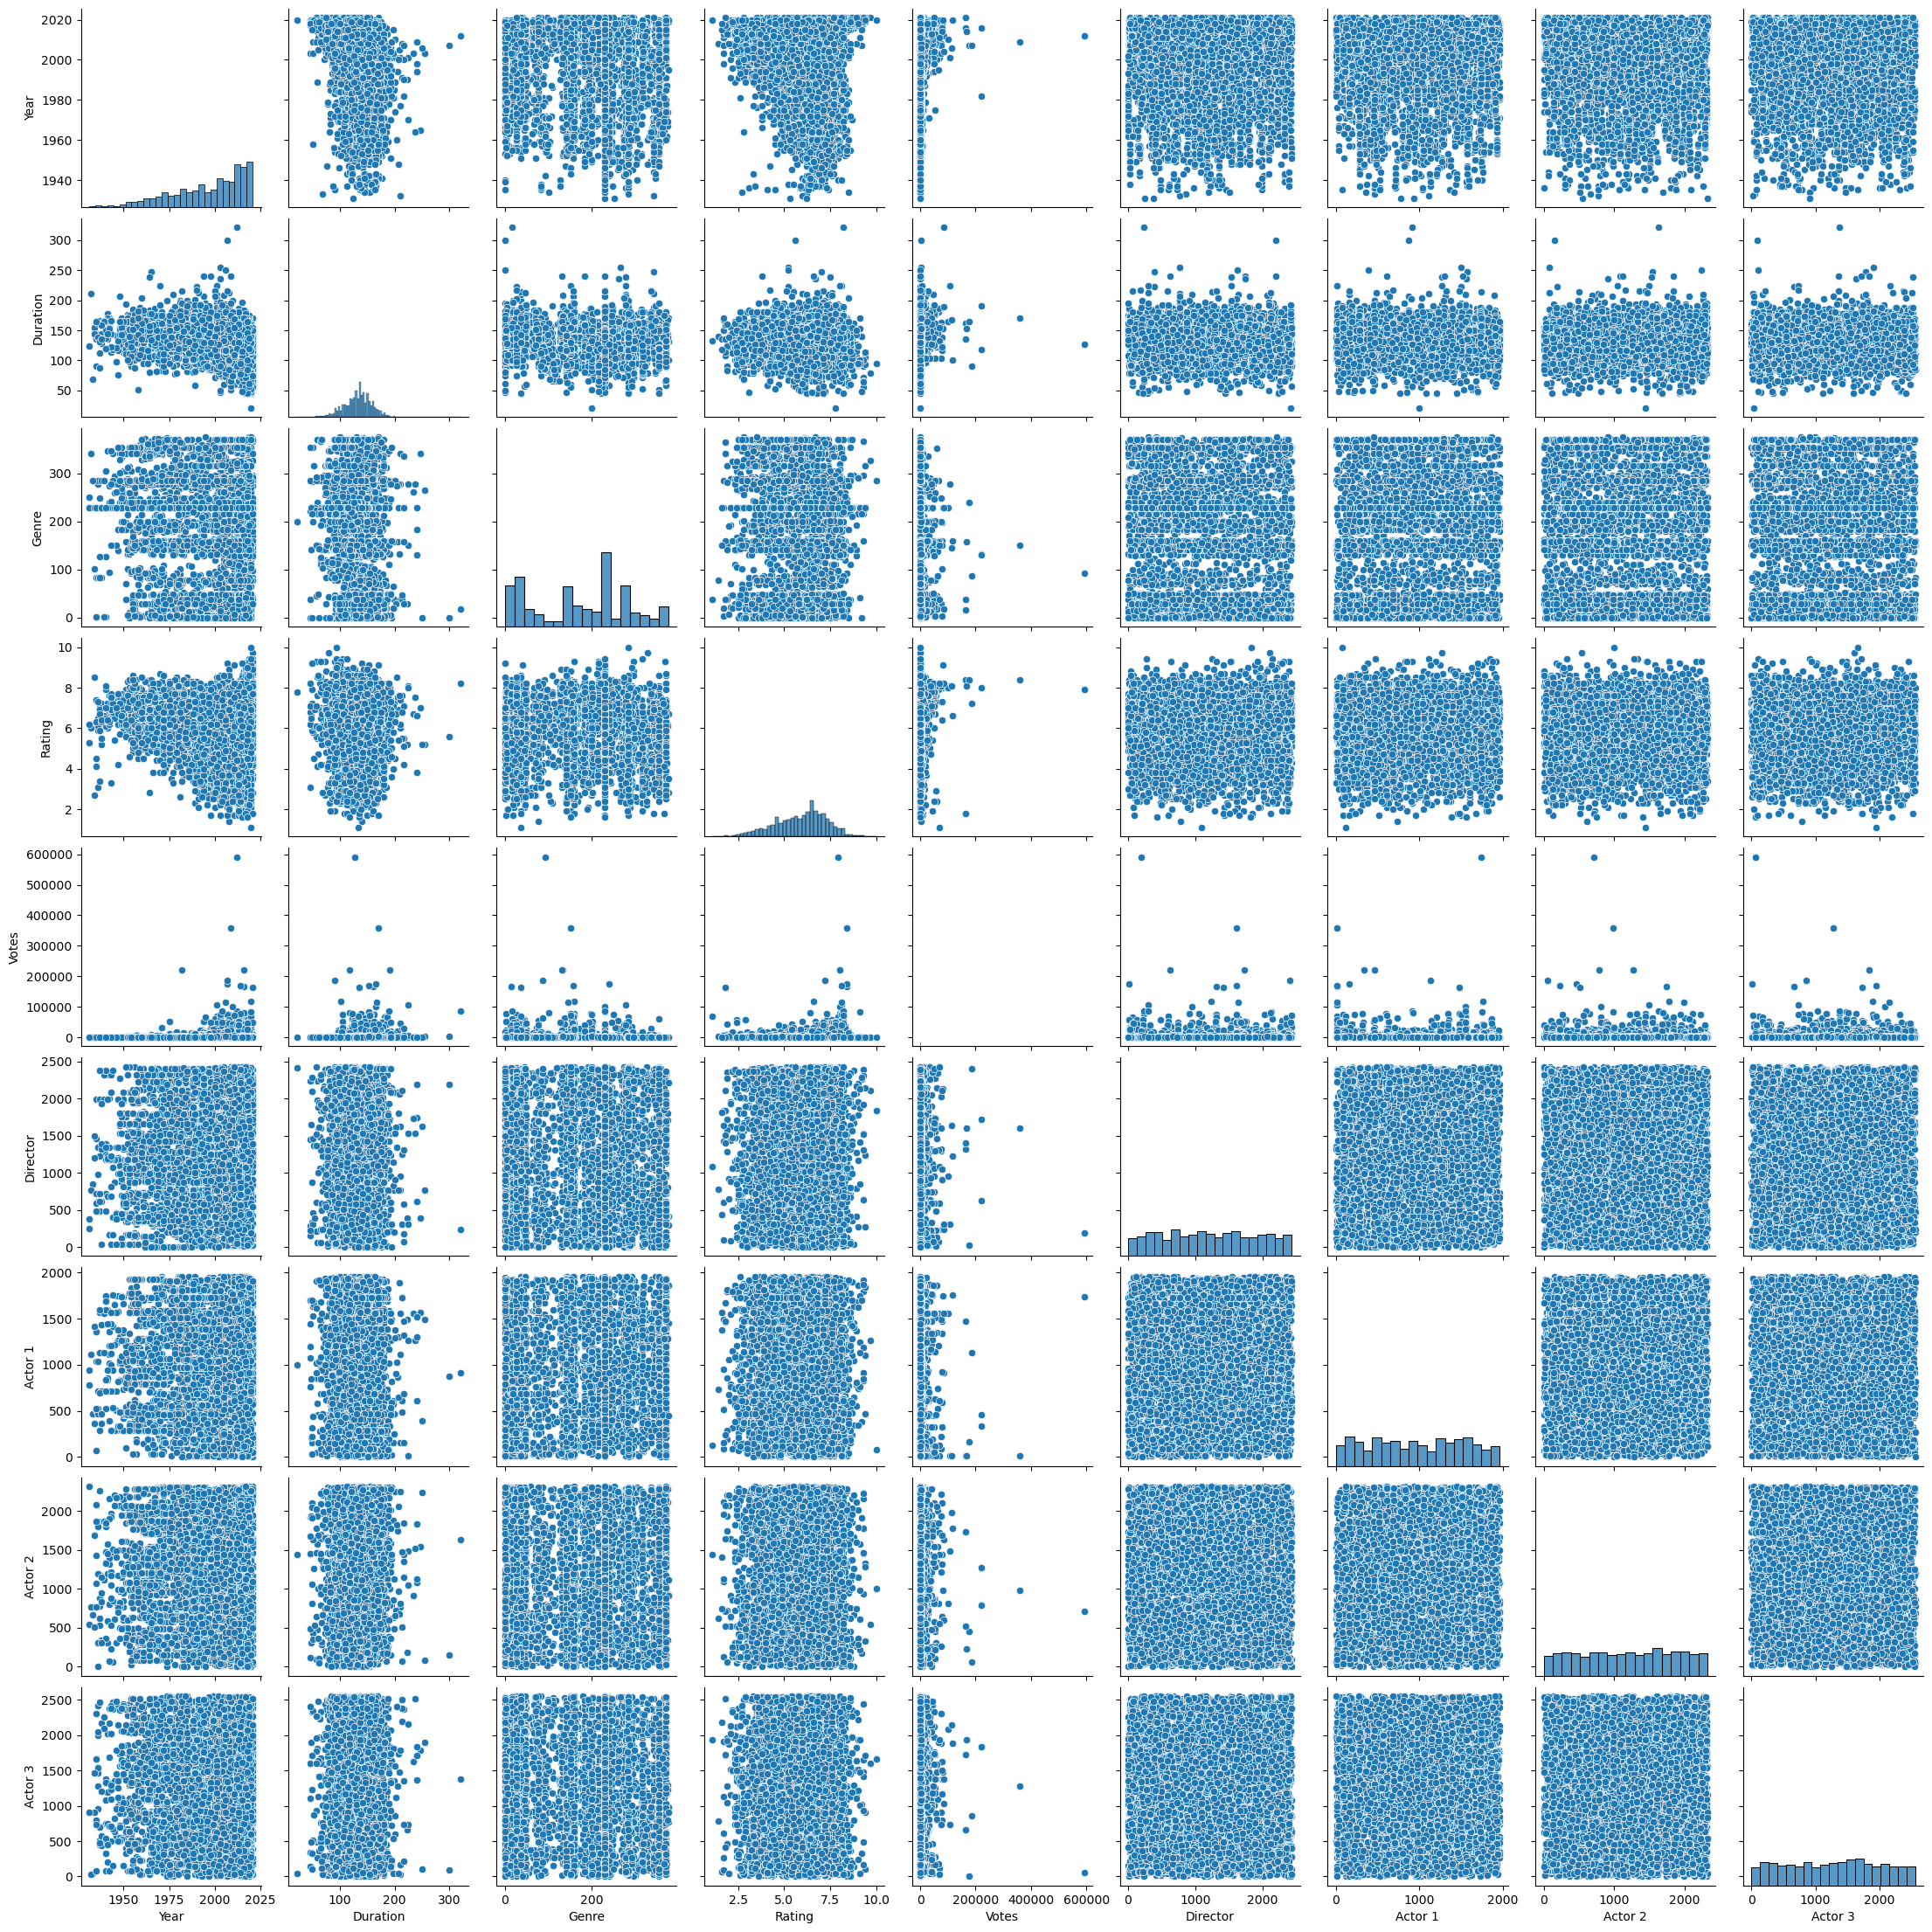

In [30]:
sns.pairplot(movie)

In [31]:
movie=movie.drop(columns=['Name','Actor 2','Actor 3'],axis=1)

In [32]:
movie.shape

(5659, 7)

In [33]:
movie['Director_encoded']=movie.groupby('Director')['Rating'].transform('mean')
movie['Actor_encoded']=movie.groupby('Actor 1')['Rating'].transform('mean')

In [34]:
movie.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Director_encoded,Actor_encoded
1,2019,109,229,7.0,8,629,1352,7.000000,6.850000
3,2019,110,184,4.4,35,1335,1198,4.400000,5.420000
5,1997,147,157,4.7,827,1530,378,5.313333,4.788889
6,2005,142,289,7.4,1086,2044,692,7.383333,5.435000
8,2012,82,320,5.6,326,135,1934,5.600000,5.600000


In [35]:
x=movie[["Votes","Genre","Duration","Director_encoded","Actor_encoded","Year"]]
y=movie[['Rating']]

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=56)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x))

In [38]:
x_train.head()

,Votes,Genre,Duration,Director_encoded,Actor_encoded,Year
13694,8,229,135,6.433333,6.300000,1990
6729,539,157,171,6.957143,6.616667,1961
10848,11,229,138,6.575000,6.153333,1966
8397,81,301,130,4.250000,5.300000,2015
14710,639,318,106,5.000000,4.500000,2004


In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Train the model
model.fit(x_train, y_train)

LinearRegression()

In [40]:
y_pred = model.predict(x_test)

In [41]:
y_pred


array([[5.5880832 ],
       [6.00416751],
       [6.40417896],
       ...,
       [7.22684777],
       [6.95682672],
       [6.74729675]])

In [42]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [43]:
mse

0.5706686137535398

In [44]:
r2

0.7124184109996062

Text(0, 0.5, 'predicted rating')

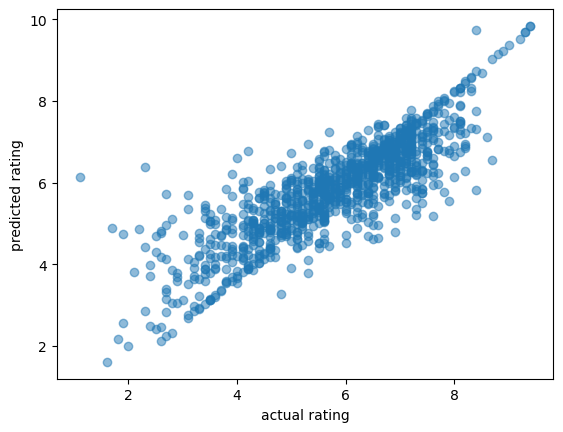

In [45]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("actual rating")
plt.ylabel("predicted rating")

Text(0, 0.5, 'residuals')

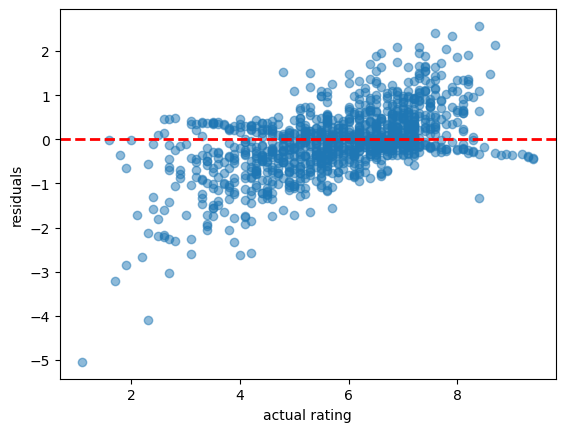

In [46]:
residuals=y_test-y_pred
plt.scatter(y_test,residuals,alpha=0.5)
plt.axhline(y=0,color='r',linestyle='--',linewidth=2)
plt.xlabel("actual rating")
plt.ylabel("residuals")